<a href="https://colab.research.google.com/github/f8sle/report/blob/main/quiz_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-7f82efefb5b7>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
<ipython-input-5-7f82efefb5b7>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH': 2, 'NORMAL': 1, 'LOW': 0})
<ipython-input-5-7f82efefb5b7>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

데이터프레임 첫 5행:
   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    2   2            2   25.355     5
1   47    1   0            2   13.093     3
2   47    1   0            2   10.114     3
3   28    2   1            2    7.798     4
4   61    2   0            2   18.043     5

전체 데이터 엔트로피: 1.9688
Feature 'Age_bin'의 정보 이득: 0.1553
Feature 'Sex'의 정보 이득: 0.0077
Feature 'BP'의 정보 이득: 0.6201
Feature 'Cholesterol'의 정보 이득: 0.0931
Feature 'Na_to_K_bin'의 정보 이득: 0.8337


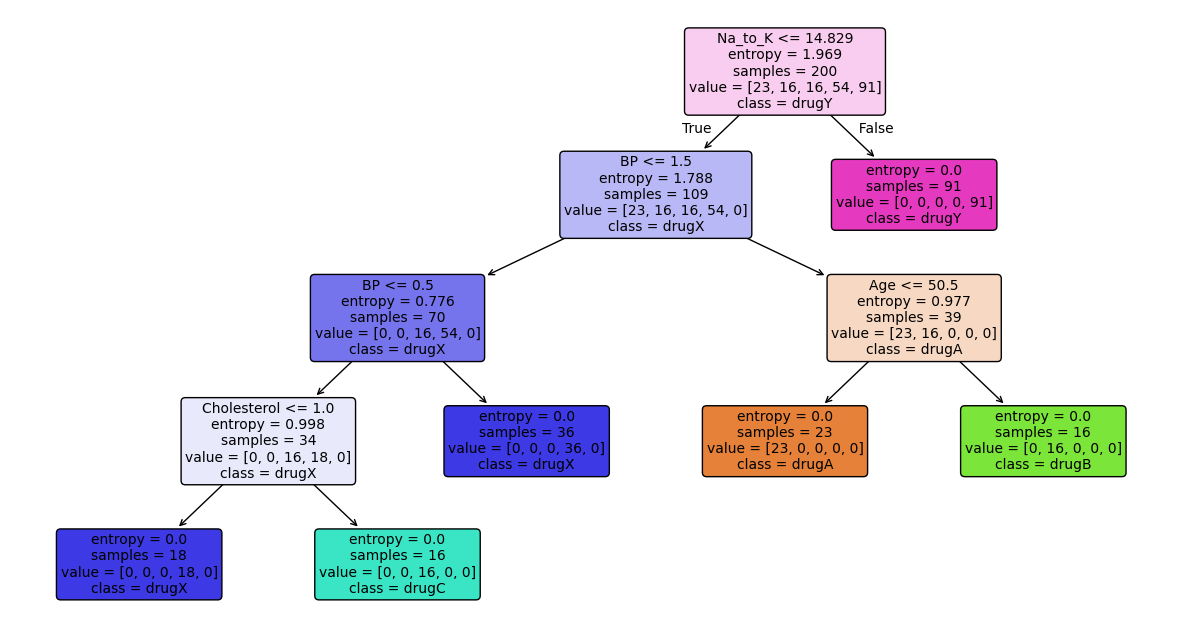

In [5]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# 데이터 로드
data = '/content/drive/MyDrive/Colab Notebooks/drug200.csv'
df = pd.read_csv(data, sep=',')

# 범주형 데이터 인코딩
df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
df['BP'] = df['BP'].replace({'HIGH': 2, 'NORMAL': 1, 'LOW': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Drug'] = df['Drug'].replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})

# 데이터 확인
print("데이터프레임 첫 5행:")
print(df.head())

# 연속형 변수 구간화 (엔트로피 계산을 위해)
df['Age_bin'] = pd.qcut(df['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Age를 4개 구간으로 나누기
df['Na_to_K_bin'] = pd.qcut(df['Na_to_K'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Na_to_K를 4개 구간으로 나누기

# 피처(X)와 타겟(y) 정의
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# 엔트로피 계산 함수
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

# 전체 엔트로피 계산
total_entropy = entropy(y)
print(f"\n전체 데이터 엔트로피: {total_entropy:.4f}")

# 각 피처의 정보 이득 계산
X_entropy = df[['Age_bin', 'Sex', 'BP', 'Cholesterol', 'Na_to_K_bin']]  # 구간화된 Age와 Na_to_K 사용
for feature in X_entropy.columns:
    feature_values = np.unique(X_entropy[feature])
    feature_entropy = 0.0
    for value in feature_values:
        idx = X_entropy[feature] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f"Feature '{feature}'의 정보 이득: {info_gain:.4f}")

# 의사결정나무 학습
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)

# 의사결정나무 시각화
plt.figure(figsize=(15, 8))
tree.plot_tree(
    clf,
    feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
    class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()